<a href="https://colab.research.google.com/github/Devasy23/FaceRec/blob/feat%2FModel-evaluation/Model-Training/Evaluated_model_try2_vs_try3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-setup


In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 13.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=67bc03a9e6bdcc6f65bb0b6581d1d41d76ee9413e12d009a71a4696a6b32e126
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


## Downloading Data

In [11]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

--2024-07-20 05:17:12--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... failed: Connection timed out.
Retrying.

--2024-07-20 05:19:24--  (try: 2)  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... failed: Connection timed out.
Retrying.

--2024-07-20 05:21:36--  (try: 3)  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... failed: Connection timed out.
Retrying.

--2024-07-20 05:23:48--  (try: 4)  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... failed: Connection timed out.
Retrying.

--2024-07-20 05:26:04--  (try: 5)  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80...

In [13]:
!tar -xzvf /content/drive/MyDrive/lfw.tgz

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

In [14]:
import os
import shutil

count = 0
for folder in os.listdir("lfw"):
    if len(os.listdir(f"lfw/{folder}")) < 5:
        shutil.rmtree(f"lfw/{folder}")
        count += 1
print(f"Removed {count} folders")
print(f"Remaining folders: {len(os.listdir('lfw'))}")

Removed 5326 folders
Remaining folders: 423


## Downloading Model

In [ ]:
finetuned_model_dir = "model"

from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="DnD11/FaceNet_Finetuned", repo_type="model", local_dir=finetuned_model_dir
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

variables/variables.index:   0%|          | 0.00/61.2k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/18.1M [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.52M [00:00<?, ?B/s]

fingerprint.pb:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/282M [00:00<?, ?B/s]

'/content/model'

# Evaluation

In [51]:
import os
import numpy as np
from tqdm import tqdm_notebook
from keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics.pairwise import euclidean_distances
from deepface import DeepFace
import tensorflow as tf


# Function to load and preprocess images
def load_and_preprocess_image(img_path, target_size=(160, 160)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array


# Function to generate embeddings
def generate_embeddings(model, dataset_path, deepface=False):
    embeddings = {}

    for class_name in tqdm_notebook(os.listdir(dataset_path)):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue
        embeddings[class_name] = []

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img_array = load_and_preprocess_image(img_path)
            if deepface:
                embedding = DeepFace.represent(
                    img_path=img_path,
                    model_name="Facenet512",
                    enforce_detection=False,
                    detector_backend="skip",
                )[0]["embedding"]
            else:
                embedding = model.predict(img_array)
            embeddings[class_name].append(embedding)
        embeddings[class_name] = np.array(embeddings[class_name])

    return embeddings


# Function to calculate intra-cluster distances
def calculate_intra_cluster_metrics(embeddings):
    metrics = {}

    for label, cluster_embeddings in embeddings.items():
        cluster_embeddings = np.squeeze(cluster_embeddings, axis=1)

        avg_embedding = np.mean(cluster_embeddings, axis=0)
        distances = euclidean_distances(cluster_embeddings, [avg_embedding])
        max_distance = np.max(distances)
        min_distance = np.min(distances)
        variance = np.var(distances)
        standard_deviation = np.std(distances)
        percentile_25 = np.percentile(distances, 25)
        percentile_50 = np.percentile(distances, 50)
        percentile_75 = np.percentile(distances, 75)

        metrics[label] = {
            "center": avg_embedding,
            "max_radius": max_distance,
            "min_radius": min_distance,
            "num_samples": len(cluster_embeddings),
            "variance": variance,
            "standard_deviation": standard_deviation,
            "percentile_25": percentile_25,
            "percentile_50": percentile_50,
            "percentile_75": percentile_75,
        }

    return metrics

In [48]:
!wget https://huggingface.co/DnD11/FaceNet_Finetuned/resolve/main/embedding_trial3.h5

--2024-07-20 06:43:23--  https://huggingface.co/DnD11/FaceNet_Finetuned/resolve/main/embedding_trial3.h5
Resolving huggingface.co (huggingface.co)... 18.239.69.83, 18.239.69.50, 18.239.69.31, ...
Connecting to huggingface.co (huggingface.co)|18.239.69.83|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/03/4f/034f80180b5ba08a0d9fe97aa18e17eb02604e9ba5c3e985eaee5a613e4810f6/2c4295909be34cae21ff3eacd9ae88bc875395030fc4d76fb2865f1e33135177?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27embedding_trial3.h5%3B+filename%3D%22embedding_trial3.h5%22%3B&Expires=1721717003&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMTcxNzAwM319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzAzLzRmLzAzNGY4MDE4MGI1YmEwOGEwZDlmZTk3YWExOGUxN2ViMDI2MDRlOWJhNWMzZTk4NWVhZWU1YTYxM2U0ODEwZjYvMmM0Mjk1OTA5YmUzNGNhZTIxZmYzZWFjZDlhZTg4YmM4NzUzOTUwMzBmYzRkNzZmYjI4NjVmM

In [49]:
# Path to the dataset
dataset_path = "lfw"
model = tf.keras.models.load_model("/content/embedding_trial3.h5")
# Generate embeddings for the original model
embeddings_original = generate_embeddings(model, dataset_path)

  0%|          | 0/423 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step


In [19]:
# Load the fine-tuned model
import tensorflow as tf

finetuned_model = tf.keras.models.load_model("/content/embedding_trial2.h5")
embeddings_finetuned = generate_embeddings(finetuned_model, dataset_path)

  0%|          | 0/423 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step


In [50]:
import pickle

with open("embeddings_trial3.pkl", "wb") as f:
    pickle.dump(embeddings_original, f)
with open("embeddings_finetuned.pkl", "wb") as f:
    pickle.dump(embeddings_finetuned, f)

## Calculate Metrics

In [24]:
embeddings_finetuned["Wen_Jiabao"].shape

(13, 1, 512)

In [52]:
# Calculate intra-cluster distances for both models
metrics_original = calculate_intra_cluster_metrics(embeddings_original)
metrics_finetuned = calculate_intra_cluster_metrics(embeddings_finetuned)

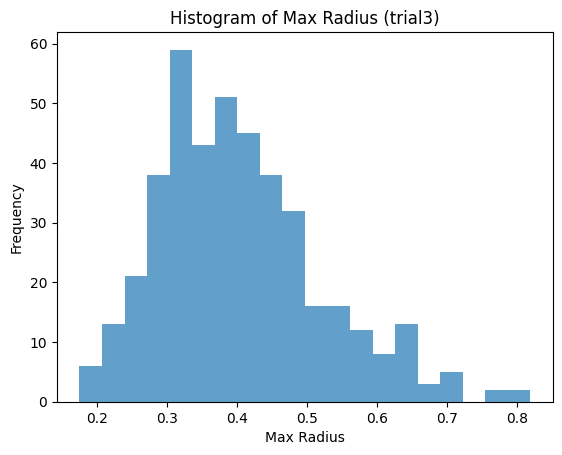

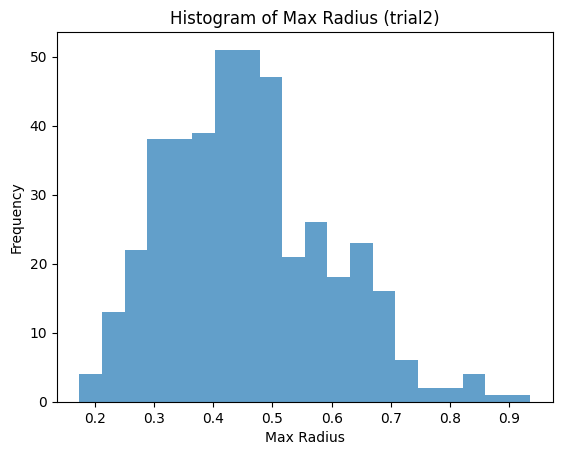

In [54]:
import matplotlib.pyplot as plt


def plot_histogram(metrics, key, title, xlabel):
    values = [metrics[label][key] for label in metrics]
    plt.figure()
    plt.hist(values, bins=20, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()


plot_histogram(
    metrics_original, "max_radius", "Histogram of Max Radius (trial3)", "Max Radius"
)
plot_histogram(
    metrics_finetuned, "max_radius", "Histogram of Max Radius (trial2)", "Max Radius"
)

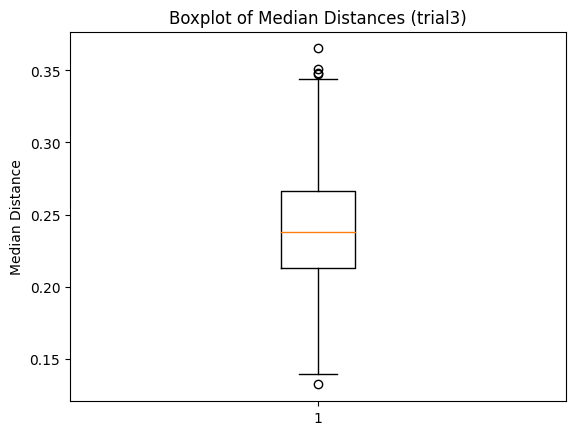

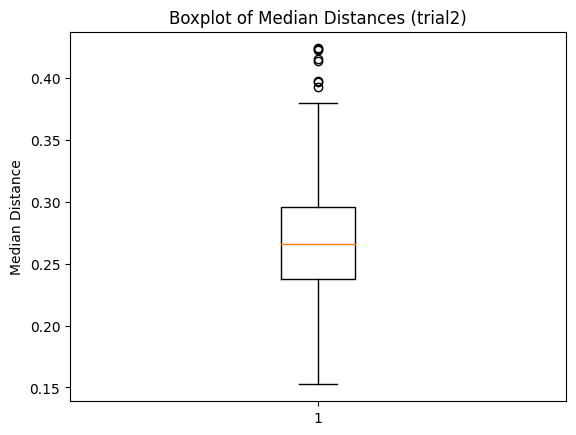

In [55]:
def plot_boxplot(metrics, key, title, ylabel):
    values = [metrics[label][key] for label in metrics]
    plt.figure()
    plt.boxplot(values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()


plot_boxplot(
    metrics_original,
    "percentile_50",
    "Boxplot of Median Distances (trial3)",
    "Median Distance",
)
plot_boxplot(
    metrics_finetuned,
    "percentile_50",
    "Boxplot of Median Distances (trial2)",
    "Median Distance",
)

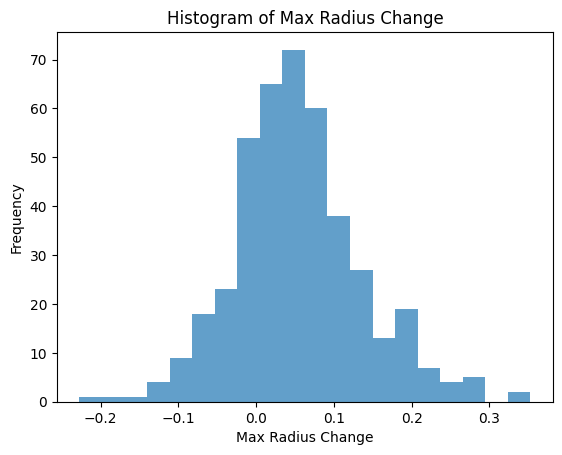

In [56]:
import matplotlib.pyplot as plt


def plot_histogram(metrics, title, xlabel):
    values = list(metrics.values())  # Extract values from the dictionary
    plt.figure()
    plt.hist(values, bins=20, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()


def compare_metrics(metrics_original, metrics_finetuned, key):
    changes = {}
    for label in metrics_original:
        if label in metrics_finetuned:
            change = metrics_finetuned[label][key] - metrics_original[label][key]
            changes[label] = change
    return changes


max_radius_change = compare_metrics(metrics_original, metrics_finetuned, "max_radius")
plot_histogram(max_radius_change, "Histogram of Max Radius Change", "Max Radius Change")

In [57]:
def calculate_inter_cluster_metrics(embeddings):
    centers = {label: metrics["center"] for label, metrics in embeddings.items()}
    labels = list(centers.keys())
    inter_cluster_distances = euclidean_distances(list(centers.values()))

    metrics = {}
    for i, label1 in enumerate(labels):
        for j, label2 in enumerate(labels):
            if i >= j:
                continue
            distance = inter_cluster_distances[i, j]
            pair = tuple(sorted((label1, label2)))
            metrics[pair] = distance

    return metrics


inter_cluster_metrics_original = calculate_inter_cluster_metrics(metrics_original)
inter_cluster_metrics_finetuned = calculate_inter_cluster_metrics(metrics_finetuned)

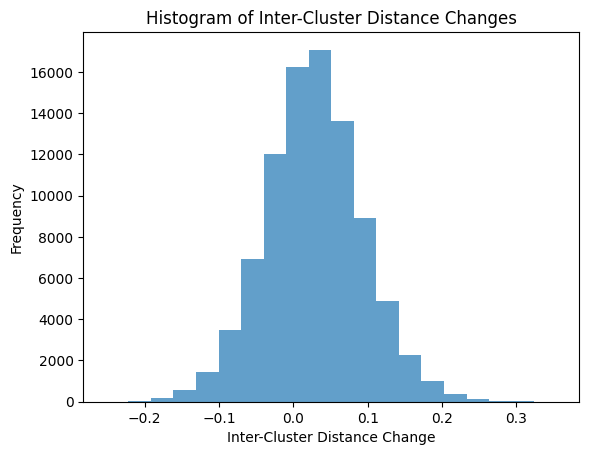

In [58]:
def compare_inter_cluster_metrics(metrics_original, metrics_finetuned):
    changes = {}
    for pair in metrics_original:
        if pair in metrics_finetuned:
            change = metrics_finetuned[pair] - metrics_original[pair]
            changes[pair] = change
    return changes


inter_cluster_distance_change = compare_inter_cluster_metrics(
    inter_cluster_metrics_original, inter_cluster_metrics_finetuned
)


def plot_inter_cluster_changes(inter_cluster_distance_change, title, xlabel):
    values = list(inter_cluster_distance_change.values())
    plt.figure()
    plt.hist(values, bins=20, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()


plot_inter_cluster_changes(
    inter_cluster_distance_change,
    "Histogram of Inter-Cluster Distance Changes",
    "Inter-Cluster Distance Change",
)

## Impact on faces

In [59]:
def classify_impact(
    intra_metrics_original,
    intra_metrics_finetuned,
    inter_metrics_original,
    inter_metrics_finetuned,
):
    impact = {
        "positively_impacted": [],
        "negatively_impacted": [],
        "averagely_impacted": [],
    }

    # Define thresholds for considering a change as significant
    threshold = 0.01  # You can adjust this value based on your needs

    # Classify intra-cluster metric changes
    for label in intra_metrics_original:
        if label in intra_metrics_finetuned:
            max_radius_change = (
                intra_metrics_finetuned[label]["max_radius"]
                - intra_metrics_original[label]["max_radius"]
            )
            if max_radius_change < -threshold:
                impact["positively_impacted"].append((label, "max_radius"))
            elif max_radius_change > threshold:
                impact["negatively_impacted"].append((label, "max_radius"))
            else:
                impact["averagely_impacted"].append((label, "max_radius"))

            # Add other metrics here if needed
            # Example: variance, standard_deviation, etc.
            variance_change = (
                intra_metrics_finetuned[label]["variance"]
                - intra_metrics_original[label]["variance"]
            )
            if variance_change < -threshold:
                impact["positively_impacted"].append((label, "variance"))
            elif variance_change > threshold:
                impact["negatively_impacted"].append((label, "variance"))
            else:
                impact["averagely_impacted"].append((label, "variance"))

    # Classify inter-cluster metric changes
    for pair in inter_metrics_original:
        if pair in inter_metrics_finetuned:
            distance_change = (
                inter_metrics_finetuned[pair] - inter_metrics_original[pair]
            )
            if distance_change < -threshold:
                impact["positively_impacted"].append((pair, "inter_cluster_distance"))
            elif distance_change > threshold:
                impact["negatively_impacted"].append((pair, "inter_cluster_distance"))
            else:
                impact["averagely_impacted"].append((pair, "inter_cluster_distance"))

    return impact


# Assuming metrics_original and metrics_finetuned are dictionaries containing the calculated metrics
impact = classify_impact(
    metrics_original,
    metrics_finetuned,
    inter_cluster_metrics_original,
    inter_cluster_metrics_finetuned,
)

# Print the impact classification
print(f"Positively Impacted Faces: {len(impact['positively_impacted'])}")
print(f"Negatively Impacted Faces: {len(impact['negatively_impacted'])}")
print(f"Averagely Impacted Faces: {len(impact['averagely_impacted'])}")

# Optional: Print detailed impact for each face
# for category, changes in impact.items():
#     print(f"\n{category.capitalize()} Faces:")
#     for change in changes:
#         print(change)

Positively Impacted Faces: 24584
Negatively Impacted Faces: 54711
Averagely Impacted Faces: 10804
